In [1]:
import sys
from os import path
sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))

import matplotlib.pyplot as pl

import config as ac
q = 1.602176e-19 #C
meV2J=1e-3*q #meV to Joules
hbar = 1.054588757e-34

import numpy as np

# Input File(s)
# -------------
ac.inputfilename = "sample-qw-barrierdope"

# Shooting method parameters for Schrödinger Equation solution
# ac.delta_E = 0.5*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. 
ac.delta_E = 0.05*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. #SRP trying difference convergence value

ac.d_E = 1e-5*meV2J #Energy step (Joules) within Newton-Raphson method when improving the precision of the energy of a found level.
ac.E_start = 0.0    #Energy to start shooting method from (if E_start = 0.0 uses minimum of energy of bandstructure)
ac.Estate_convergence_test = 1e-9*meV2J
# FermiDirac
ac.FD_d_E = 1e-9 #Initial and minimum Energy step (meV) for derivative calculation for Newton-Raphson method to find E_F
ac.FD_convergence_test = 1e-6 #meV
ac.np_d_E = 1.0 # Energy step (meV) for dispersion calculations
# Poisson Loop
ac.damping = 0.5    #averaging factor between iterations to smooth convergence.
ac.max_iterations=80 #maximum number of iterations.
ac.convergence_test=1e-6 #convergence is reached when the ground state energy (meV) is stable to within this number between iterations.

# Output Files
# ------------

notebook_name = "x_sweep"
# filename_without_extension = path.splitext(path.basename("tutoria1_sef_consistent_debugging.ipynb"))[0]

ac.output_directory = notebook_name
ac.parameters = True
ac.electricfield_out = True
ac.potential_out = True
ac.sigma_out = True
ac.probability_out = True
ac.states_out = True

# Result Viewer
# -------------
ac.resultviewer = True
ac.wavefunction_scalefactor = 200 # scales wavefunctions when plotting QW diagrams
# Messages
# --------
ac.messagesoff = False
ac.logfile = 'aestimo.log'

#Here, we will alter the default settings of the config.py file for the purposes of this tutorial
ac.use_cython = False
# ac.messagesoff = True

In [2]:
class Structure(object): pass
s = Structure() # this will be our datastructure

# TEMPERATURE
s.T = 4.0 #Kelvin

# COMPUTATIONAL SCHEME
# 0: Schrodinger
# 1: Schrodinger + nonparabolicity
# 2: Schrodinger-Poisson
# 3: Schrodinger-Poisson with nonparabolicity
# 4: Schrodinger-Exchange interaction
# 5: Schrodinger-Poisson + Exchange interaction
# 6: Schrodinger-Poisson + Exchange interaction with nonparabolicity
s.computation_scheme =3

# Non-parabolic effective mass function
# 0: no energy dependence
# 1: Nelson's effective 2-band model
# 2: k.p model from Vurgaftman's 2001 paper
s.meff_method = 2

# Non-parabolic Dispersion Calculations for Fermi-Dirac
s.fermi_np_scheme = True #needed only for aestimo_numpy2.py

# QUANTUM
# Total subband number to be calculated for electrons
s.subnumber_e = 2
# Total subband number to be calculated for electrons (needed only for aestimo_numpy_h)
s.subnumber_h = 1 

# APPLIED ELECTRIC FIELD
s.Fapplied = 0.00/50e-9 # (V/m)

# --------------------------------
# REGIONAL SETTINGS FOR SIMULATION
# --------------------------------

# GRID
# For 1D, z-axis is choosen
s.gridfactor = 0.05 #nm
s.maxgridpoints = 200000 #for controlling the size

dopant = 0.375e19 #cm^-3, doping concentration
well_l = 3.0
x_frac = 0.32
barrier_l = 7.0
dopant_length = 1.0

# s.material =[[ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#              [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ well_l, 'GaAs', 0, 0, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ well_l, 'GaAs', 0, 0, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n']]

# s.material =[[ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#              [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ well_l, 'GaAs', 0, 0, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n']]
s.material =[[ dopant_length, 'AlGaAs', x_frac, dopant, 'n'],
            [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
            [ well_l, 'GaAs', 0, 0, 'n'],
            [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
            [ dopant_length, 'AlGaAs', x_frac, dopant, 'n']]

# s.material =[[ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#              [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ well_l, 'GaAs', 0, 0, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ well_l, 'GaAs', 0, 0, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n'],
#             [ 1.0, 'AlGaAs', x_frac, dopant, 'n'],
#             [ barrier_l, 'AlGaAs', x_frac, 0.0, 'n']]



In [3]:
def plot_QW_view(result,title):
    fig2 = pl.figure()
    pl.suptitle(title,fontsize = 15)
    pl.subplot(1, 1, 1)
    pl.plot(result.xaxis*1e9, result.fitot/meV2J, "k",label="Potential")
    for level, state in zip(result.E_state, result.wfe):
    
        pl.axhline(level, 0.1, 0.9, color="g", ls="--")
        pl.plot(result.xaxis*1e9, state * ac.wavefunction_scalefactor + level, "b")
        # pl.plot(xaxis, state**2*1e-9/dx*200.0+level,'b')
    pl.axhline(result.E_F, 0.1, 0.9, color="r", ls="--",label="chemical potential")
    pl.xlabel("Position (nm)")
    pl.ylabel("Energy (meV)")
    pl.grid(True)
    pl.legend()
    return fig2

In [4]:
def plot_dispersions(result,title):
    # dispersion plot
    fig3 = pl.figure()
    pl.suptitle(title,fontsize = 18)
    ax = pl.subplot(1, 1, 1)
    result.level_dispersions
    cb_meff0 = result.meff_state[0]  # kg
    ka = np.linspace(
        0.0, np.sqrt(2.0 * cb_meff0 * result.fitot.ptp()) / hbar, 50
    )  # m**-1
    kax = ka * 1e-9
    for Ei, meffi in zip(result.E_state, result.meff_state):
        # (p1,) = pl.plot(kax, Ei + (1/meV2J) * hbar ** 2 * ka ** 2 / (2 * cb_meff0), "k",label="parabolic dispersion")
        (p2,) = pl.plot(kax, Ei + (1/meV2J) * hbar ** 2 * ka ** 2 / (2 * meffi), "b",label="parabolic dispersion (subband meff)")
    # if result.level_dispersions:
    #     for Ea, cb_meff_a, ka in result.level_dispersions:
    #         (p3,) = pl.plot(ka * 1e-9, Ea, "g")
    #     # ax.legend(
    #     #     [p1, p2, p3],
    #     #     [
    #     #         "parabolic dispersions",
    #     #         "parabolic dispersion (subband meff)",
    #     #         "non-parabolic dispersions",
    #     #     ],
    #     # )
    # else:
    #     ax.legend(
    #         [p1, p2],
    #         ["parabolic dispersions", "parabolic dispersion (subband meff)"],
    #     )
    # ax.legend("parabolic dispersions")
    pl.axhline(result.E_F, 0.0, 1.0, color="r", ls="--")
    pl.xlabel("k-space (nm**-1)",fontsize=14)
    pl.ylabel("Energy (meV)",fontsize=14)
    pl.grid(True)
    return fig3

WARNING aestimo logs automatically to aestimo.log in the example's directory.
WARNING psi_at_inf_cython module not found
INFO Total layer number: 5
INFO Total number of materials in database: 25
INFO Ntotal2d 7.5e+15 m**-2
INFO Iteration: 1
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 1063.172665 meV
INFO E[1]= 1240.584631 meV
INFO meff[0]= 0.070974
INFO meff[1]= 0.087033
INFO N[0]= 7.5e+15 m**-2
INFO N[1]= 0 m**-2
INFO Efermi (at 4K) = 1088.24 meV
INFO total donor charge = 7.5e+15 m**-2
INFO total level charge = 7.5e+15 m**-2
INFO total system charge = -5749.06 m**-2
INFO Iteration: 2
INFO Working for subband no: 1
INFO Working for subband no: 2
INFO E[0]= 1083.032436 meV
INFO E[1]= 1252.668264 meV
INFO meff[0]= 0.071006
INFO meff[1]= 0.087119
INFO N[0]= 7.5e+15 m**-2
INFO N[1]= 0 m**-2
INFO Efermi (at 4K) = 1107.75 meV
INFO total donor charge = 7.5e+15 m**-2
INFO total level charge = 7.5e+15 m**-2
INFO total system charge = 8264.31 m**-2
INFO Iteration: 3


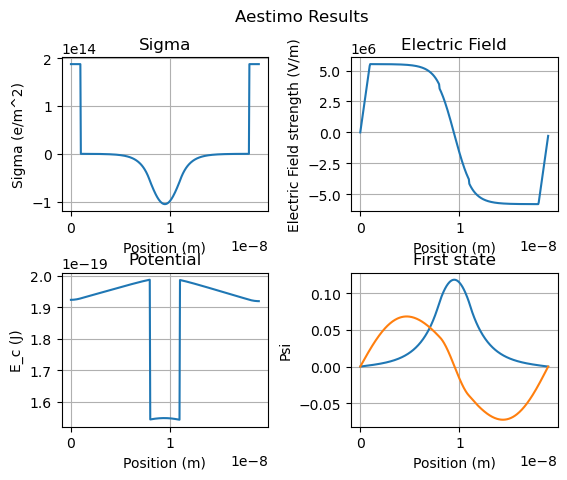

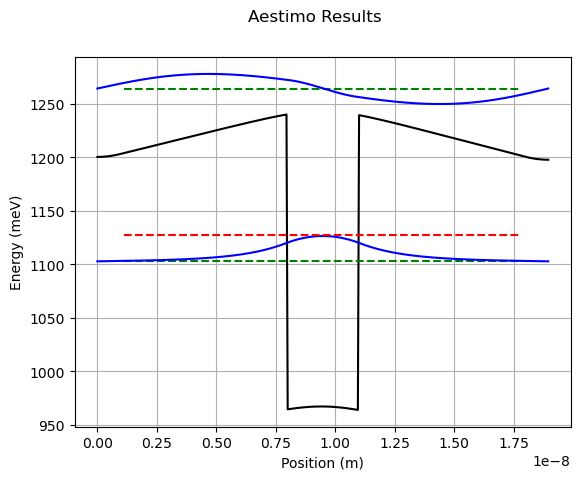

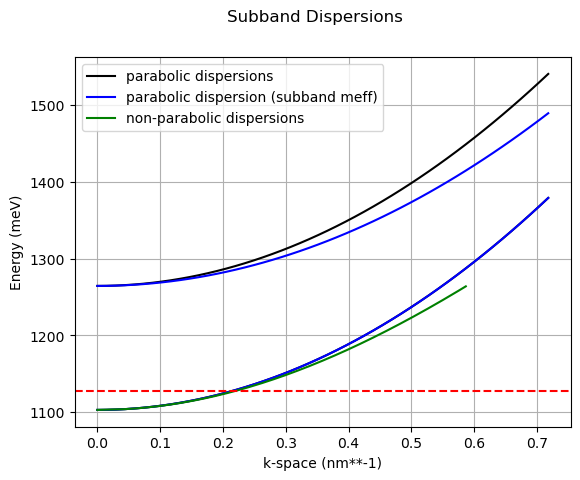

INFO Simulation is finished.


In [5]:
import aestimo as solver
import database as adatabase
# Initialise structure class
structure = s
model = solver.StructureFrom(structure,adatabase) # structure could also be a dictionary.
    
#calculate QW states
result = solver.Poisson_Schrodinger(model)


# Write the simulation results in files
%matplotlib inline
solver.save_and_plot(result,model)
solver.logger.info("Simulation is finished.")

state, Energy, Population, effective mass
     ,meV    , cm**-2    , m_e**-1
    0 1102.75     7.5e+11, 6.47e-32
    1 1264.31           0, 7.95e-32
state, Energy offset from GaAs CBM
     ,meV  
    0 138.938
    1 300.495


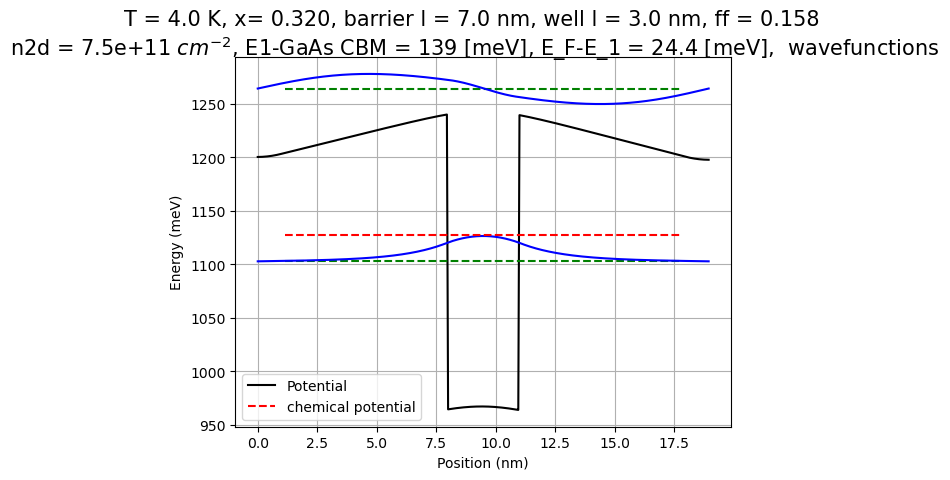

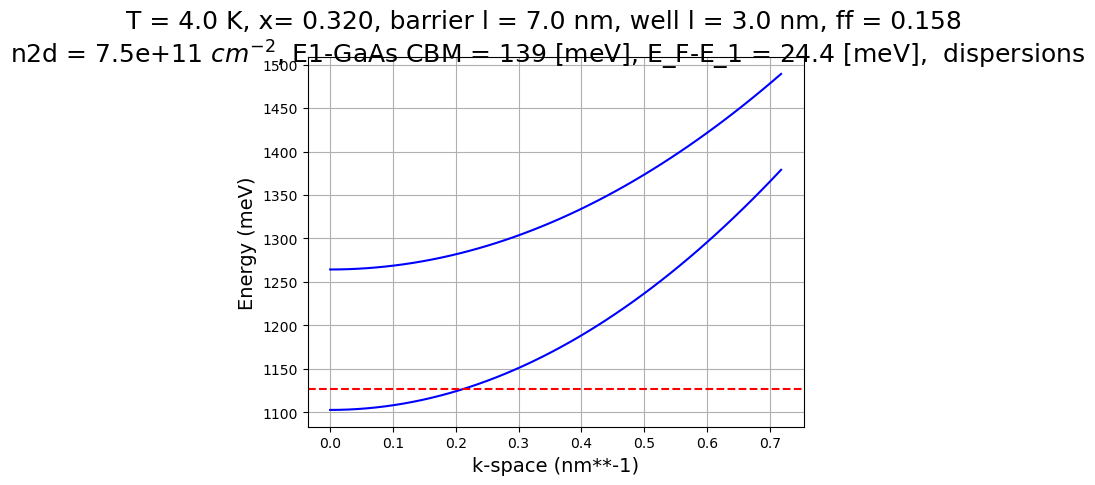

In [6]:
import numpy as np
pot_GaAs = np.min(result.fitot)/meV2J  # GaAs CBM
pot_AlGaAs = np.max(result.fitot)/meV2J  # AlGaAs CBM

print('state, Energy, Population, effective mass')
print('     ,meV    , cm**-2    , m_e**-1')
for num,E,N,meff in zip(range(result.subnumber_e),result.E_state,result.N_state,result.meff_state):
    print('%5d %7g %11.3g, %7.3g' %(num,E,N*1e-4,meff))

print('state, Energy offset from GaAs CBM')
print('     ,meV  ')
for num,E in zip(range(result.subnumber_e),result.E_state):
    print('%5d %7g' %(num,E-pot_GaAs))

E21 = result.E_state[1] - result.E_state[0]  # E21 is the energy difference between the first two states
EFCBM = result.E_F - pot_GaAs  # Fermi level with respect to GaAs CBM
E1F = result.E_F-result.E_state[0] #fermi level with respect to the first state
Ntotal2d = sum(model.dop) * model.dx #m^-2
Ntotal3d = Ntotal2d /(2*barrier_l*1e-9)
ff = well_l/(well_l + 2*barrier_l + 2*dopant_length)

# title = r"T = %g K, x= %0.3f, dopant = %g $10^{18} cm^{-2}$, comp scheme = %g, E21 = %0.2f meV, EF - GaAsCBM = %0.2f meV" % (s.T,x_frac,Ntotal2d,s.computation_scheme,E21,EFCBM)
# title = r"T = %g K, x= %0.3f, dopant = %g $cm^{-2}$, comp scheme = %g, barrier l = %g nm \n well l = %g nm, E1-GaAs CBM = %g [meV]" % (s.T,x_frac,Ntotal2d*1e-4,s.computation_scheme,barrier_l, well_l,result.E_state[0]-pot_GaAs)

# title = (
#     f"T = {s.T} K, x= {x_frac:.3f}, comp scheme = {s.computation_scheme}, barrier l = {barrier_l} nm, well l = {well_l} nm, ff = {ff:.3g} \n"
#     f"n2d = {Ntotal2d*1e-4:.3g} $cm^{{-2}}$, effective n3d in barriers = {Ntotal3d*1e-6:.3g} $cm^{{-3}}$, E1-GaAs CBM = {result.E_state[0]-pot_GaAs:.3g} [meV], E_F-E_1 = {E1F:.3g} [meV],  E1- AlGaAs CBM = {result.E_state[0]-pot_AlGaAs:.3g} [meV], "
# )

# title = (
#     f"T = {s.T} K, x= {x_frac:.3f}, comp scheme = {s.computation_scheme}, barrier l = {barrier_l} nm, well l = {well_l} nm, ff = {ff:.3g} \n"
#     f"n2d = {Ntotal2d*1e-4:.3g} $cm^{{-2}}$, effective n3d in barriers = {Ntotal3d*1e-6:.3g} $cm^{{-3}}$, E1-GaAs CBM = {result.E_state[0]-pot_GaAs:.3g} [meV], E_F-E_1 = {E1F:.3g} [meV], "
# )


title = (
    f"T = {s.T} K, x= {x_frac:.3f}, barrier l = {barrier_l} nm, well l = {well_l} nm, ff = {ff:.3g} \n"
    f"n2d = {Ntotal2d*1e-4:.3g} $cm^{{-2}}$, E1-GaAs CBM = {result.E_state[0]-pot_GaAs:.3g} [meV], E_F-E_1 = {E1F:.3g} [meV], "
)

# title = f"well l = {well_l} nm"

fig_titled = plot_QW_view(result, title + " wavefunctions ")
dispersions_titled = plot_dispersions(result, title + " dispersions")


state, Energy, Population, effective mass
     ,meV    , cm**-2    , m_e**-1
    0 1102.75     7.5e+11, 6.47e-32
    1 1264.31           0, 7.95e-32
state, Energy offset from GaAs CBM
     ,meV  
    0 138.938
    1 300.495


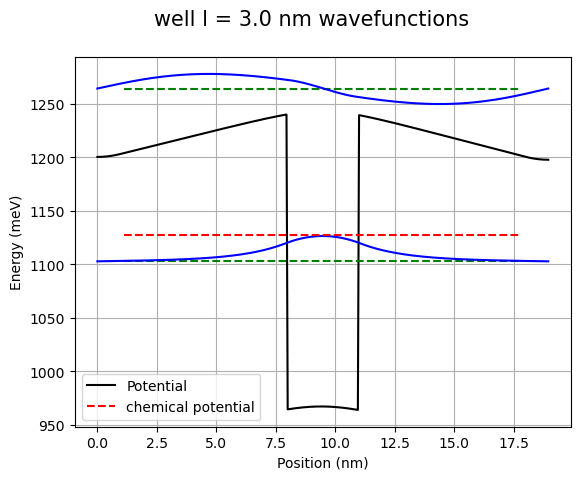

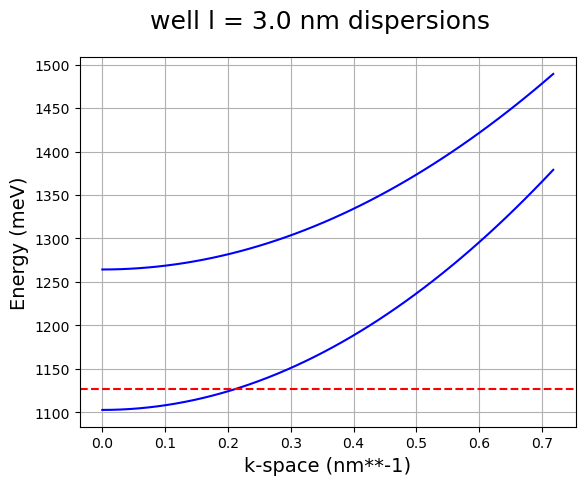

In [7]:
import numpy as np
pot_GaAs = np.min(result.fitot)/meV2J  # GaAs CBM
pot_AlGaAs = np.max(result.fitot)/meV2J  # AlGaAs CBM

print('state, Energy, Population, effective mass')
print('     ,meV    , cm**-2    , m_e**-1')
for num,E,N,meff in zip(range(result.subnumber_e),result.E_state,result.N_state,result.meff_state):
    print('%5d %7g %11.3g, %7.3g' %(num,E,N*1e-4,meff))

print('state, Energy offset from GaAs CBM')
print('     ,meV  ')
for num,E in zip(range(result.subnumber_e),result.E_state):
    print('%5d %7g' %(num,E-pot_GaAs))

E21 = result.E_state[1] - result.E_state[0]  # E21 is the energy difference between the first two states
EFCBM = result.E_F - pot_GaAs  # Fermi level with respect to GaAs CBM
E1F = result.E_F-result.E_state[0] #fermi level with respect to the first state
Ntotal2d = sum(model.dop) * model.dx #m^-2
Ntotal3d = Ntotal2d /(2*barrier_l*1e-9)
ff = well_l/(well_l + 2*barrier_l + 2*dopant_length)

# title = r"T = %g K, x= %0.3f, dopant = %g $10^{18} cm^{-2}$, comp scheme = %g, E21 = %0.2f meV, EF - GaAsCBM = %0.2f meV" % (s.T,x_frac,Ntotal2d,s.computation_scheme,E21,EFCBM)
# title = r"T = %g K, x= %0.3f, dopant = %g $cm^{-2}$, comp scheme = %g, barrier l = %g nm \n well l = %g nm, E1-GaAs CBM = %g [meV]" % (s.T,x_frac,Ntotal2d*1e-4,s.computation_scheme,barrier_l, well_l,result.E_state[0]-pot_GaAs)

title = (
    f"T = {s.T} K, x= {x_frac:.3f}, comp scheme = {s.computation_scheme}, barrier l = {barrier_l} nm, well l = {well_l} nm, ff = {ff:.3g} \n"
    f"n2d = {Ntotal2d*1e-4:.3g} $cm^{{-2}}$, effective n3d in barriers = {Ntotal3d*1e-6:.3g} $cm^{{-3}}$, E1-GaAs CBM = {result.E_state[0]-pot_GaAs:.3g} [meV], E_F-E_1 = {E1F:.3g} [meV],  E1- AlGaAs CBM = {result.E_state[0]-pot_AlGaAs:.3g} [meV], "
)

# title = (
#     f"T = {s.T} K, x= {x_frac:.3f}, comp scheme = {s.computation_scheme}, barrier l = {barrier_l} nm, well l = {well_l} nm, ff = {ff:.3g} \n"
#     f"n2d = {Ntotal2d*1e-4:.3g} $cm^{{-2}}$, effective n3d in barriers = {Ntotal3d*1e-6:.3g} $cm^{{-3}}$, E1-GaAs CBM = {result.E_state[0]-pot_GaAs:.3g} [meV], E_F-E_1 = {E1F:.3g} [meV], "
# )

title = f"well l = {well_l} nm"

fig_titled = plot_QW_view(result, title + " wavefunctions ")
dispersions_titled = plot_dispersions(result, title + " dispersions")


In [8]:
result.N_state

[7500000000000022.0, 0.0]

In [9]:
Ntotal2d = sum(model.dop) * model.dx
print('Total doping density: %g cm^-2' % ( Ntotal2d * 1e-4))  # converting to cm^-2

Total doping density: 7.5e+11 cm^-2


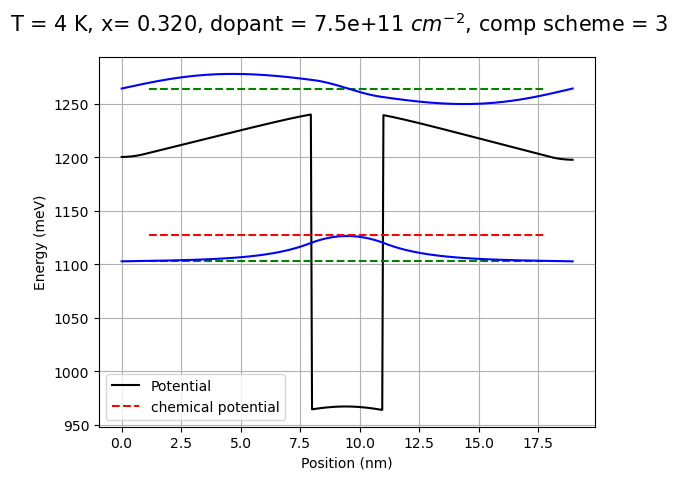

In [10]:
title = r"T = %g K, x= %0.3f, dopant = %g $cm^{-2}$, comp scheme = %g" % (s.T,x_frac,Ntotal2d*1e-4,s.computation_scheme)

fig_titled = plot_QW_view(result, title)